### Data Multivariable

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('C:/Users/82109/Desktop/Study/AI Basic Course/data/mpg.csv')

In [37]:
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [38]:
df.dropna(subset=['weight'],inplace=True)
df.dropna(subset=['mpg'],inplace=True)

In [39]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [40]:
mdf = df[['mpg','cylinders','horsepower','weight']]

In [41]:
# x1, x2, x3
x = mdf[['cylinders','horsepower','weight']]
y = mdf['mpg']

In [42]:
x.head()

,cylinders,horsepower,weight
0,8,130.0,3504
1,8,165.0,3693
2,8,150.0,3436
3,8,150.0,3433
4,8,140.0,3449


In [43]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 3)
(118, 3)
(274,)
(118,)


### 다중 회귀분석

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor

In [47]:
# lr = LinearRegression()
# lr = BayesianRidge()
lr = TweedieRegressor()

In [48]:
lr.fit(x_train, y_train)

LinearRegression()

In [49]:
r_square = lr.score(x_test, y_test)
print(r_square)

0.6504841715261304


In [50]:
print(lr.coef_, lr.intercept_)

[-0.80307706 -0.01540722 -0.00566275] 46.34413391731004


In [51]:
y_hat = lr.predict(x_test)

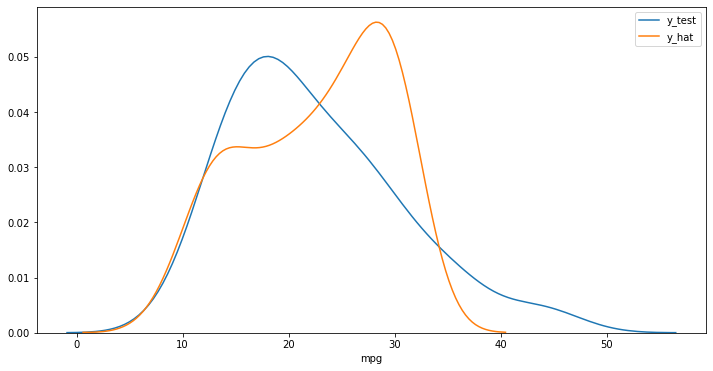

In [53]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False, label = 'y_test')
ax2 = sns.distplot(y_hat,hist=False, label = 'y_hat',ax=ax1)
plt.show()
